# IMPORTING LIBRARIES


In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from sklearn.decomposition import PCA
import tensorflow_hub as hub
#from pycaret.classification import * 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
#from googletrans import Translator
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale range', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)
import pandas as pd
#import pycaret

# READING DATASET

In [3]:
import pandas as pd
import os

true_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

true_data.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_data['Target']=['True']*len(true_data)
fake_data['Target']=['Fake']*len(fake_data)

In [6]:
data=true_data.append(fake_data).sample(frac=1).reset_index().drop(columns=['index'])

In [7]:
cat_tar=pd.get_dummies(data.Target)['Fake']

In [8]:
label_size = [cat_tar.sum(),len(cat_tar)-cat_tar.sum()]

([<matplotlib.patches.Wedge at 0x1655d0760>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake News'),
  Text(1.1968726986325005, 0.08657796063754254, 'True News')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

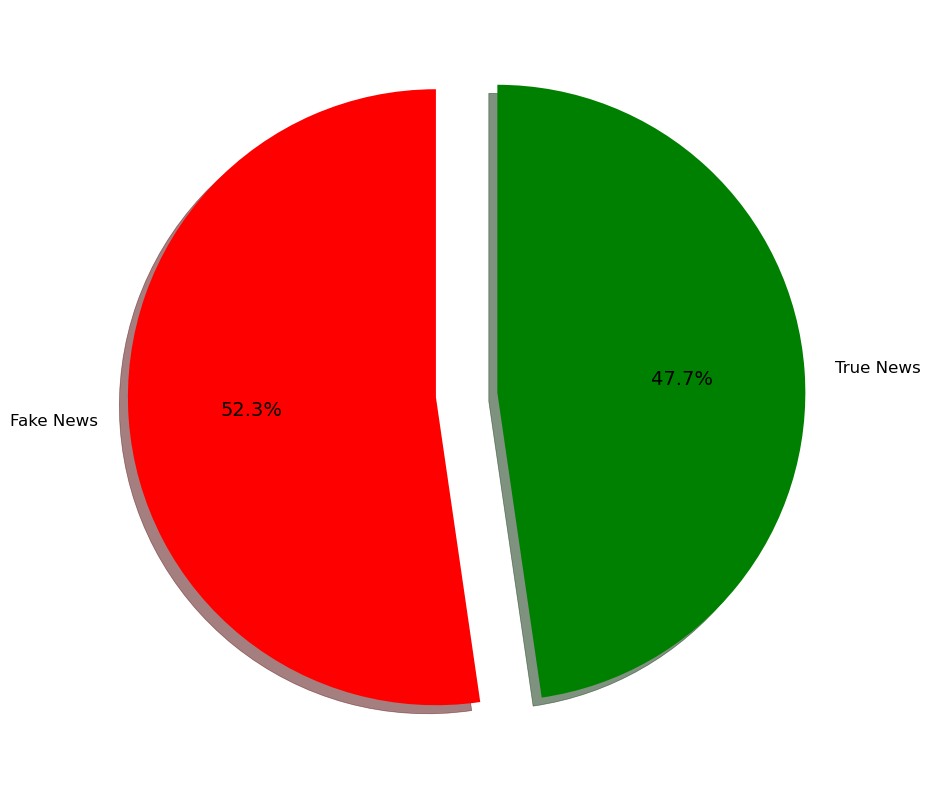

In [9]:
plt.pie(label_size,explode=[0.1,0.1],colors=['red','green'],startangle=90,shadow=True,labels=['Fake News','True News'],autopct='%1.1f%%')

In [10]:
data['label']=pd.get_dummies(data.Target)['Fake']
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=data['Target'])

In [11]:

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [12]:
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0, 0.5, 'Number of texts')

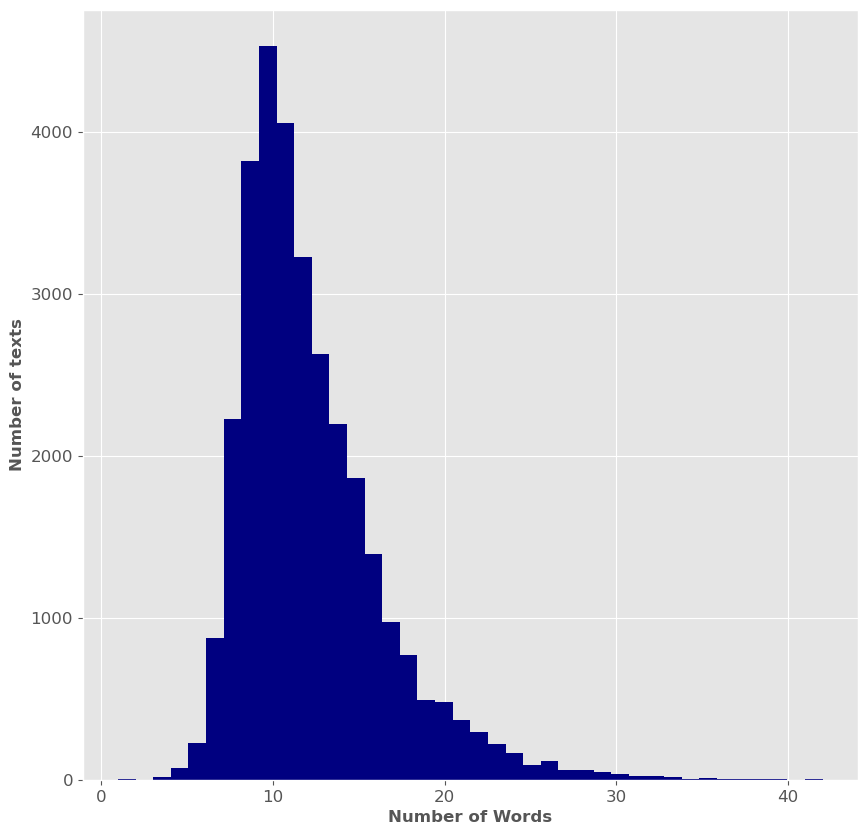

In [13]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 40,color='navy')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

Text(0, 0.5, 'Number of texts')

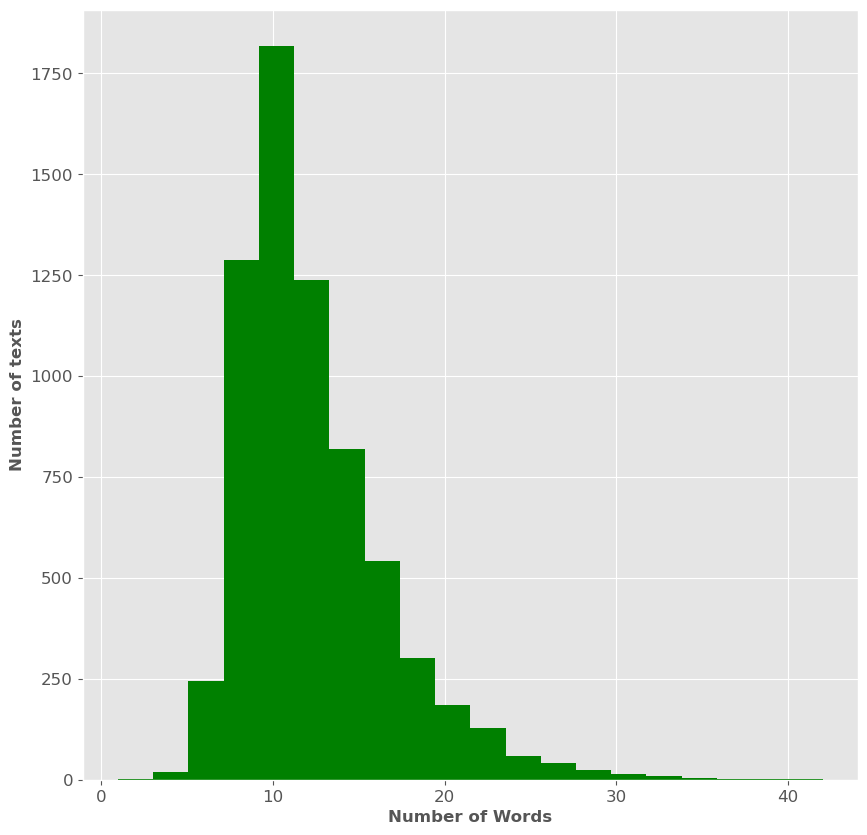

In [14]:
seq_len = [len(i.split()) for i in val_text]

pd.Series(seq_len).hist(bins = 20,color='green')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

Text(0, 0.5, 'Number of texts')

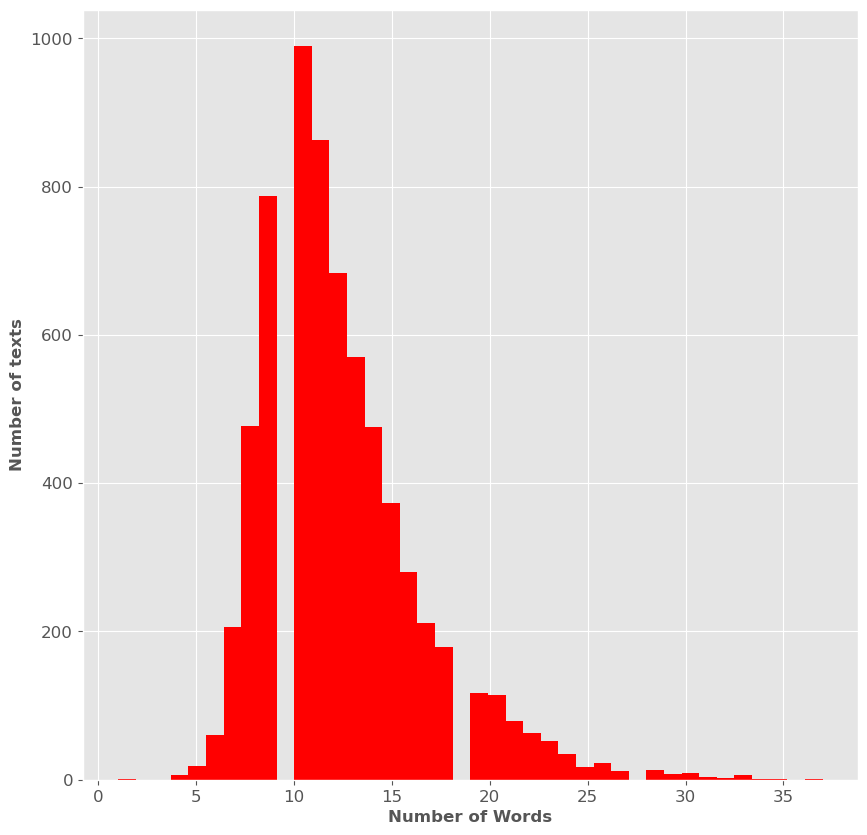

In [15]:
seq_len = [len(i.split()) for i in test_text]

pd.Series(seq_len).hist(bins = 40,color='red')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [16]:
MAX_LENGHT = 15
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [17]:
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [18]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [19]:
for param in bert.parameters():
    param.requires_grad = False

In [20]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [21]:
model = BERT_Arch(bert)
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate

In [40]:
from sklearn.utils import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels                                                    
                                    )
class_weight_dict = dict(zip(np.unique(train_labels), class_weights))
class_weights

import torch
from torch import nn
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# extract the values from the dictionary
class_weights = list(class_weight_dict.values())

# convert class_weights to a PyTorch tensor
weights = torch.tensor(class_weights, dtype=torch.float)

# define the loss function
cross_entropy = nn.NLLLoss(weight=weights)


In [41]:
import torch
from torch import nn
weights= torch.tensor(class_weights,dtype=torch.float)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

In [42]:
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r for r in batch]
    sent_id, mask, labels = batch
    #print(type(labels),type(mask),type(sent_id))
    #print(sent_id)
    # clear previously calculated gradients 
    model.zero_grad()        
    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [43]:
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      #elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [44]:
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  Batch   650  of    983.
  Batch   700  of    983.
  Batch   750  of    983.
  Batch   800  of    983.
  Batch   850  of    983.
  Batch   900  of    983.
  Batch   950  of    983.

Evaluating...
  Batch    50  of    211.
  Batch   100  of    211.
  Batch   150  of    211.
  Batch   200  of    211.

Training Loss: 0.567
Validation Loss: 0.487

 Epoch 2 / 10
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.


In [45]:
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [46]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()
  preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3212
           1       0.92      0.84      0.88      3523

    accuracy                           0.88      6735
   macro avg       0.88      0.88      0.88      6735
weighted avg       0.89      0.88      0.88      6735



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cf_matrix = confusion_matrix(preds,test_y)
print(cf_matrix)

[[2969  553]
 [ 243 2970]]


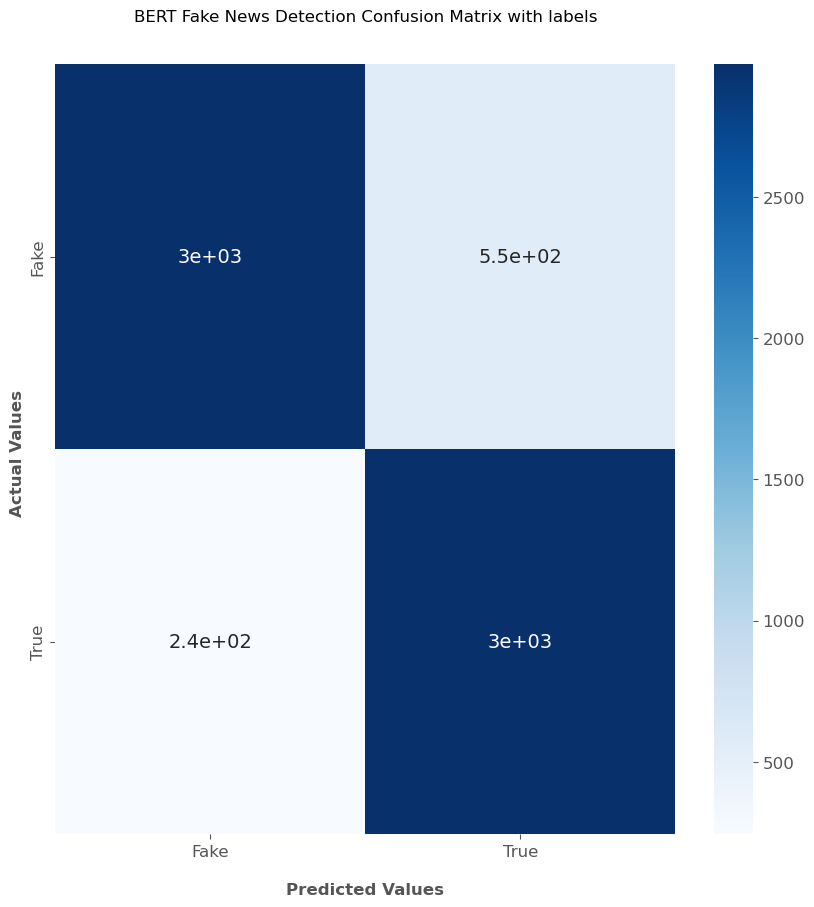

In [49]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('BERT Fake News Detection Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fake','True'])
ax.yaxis.set_ticklabels(['Fake','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


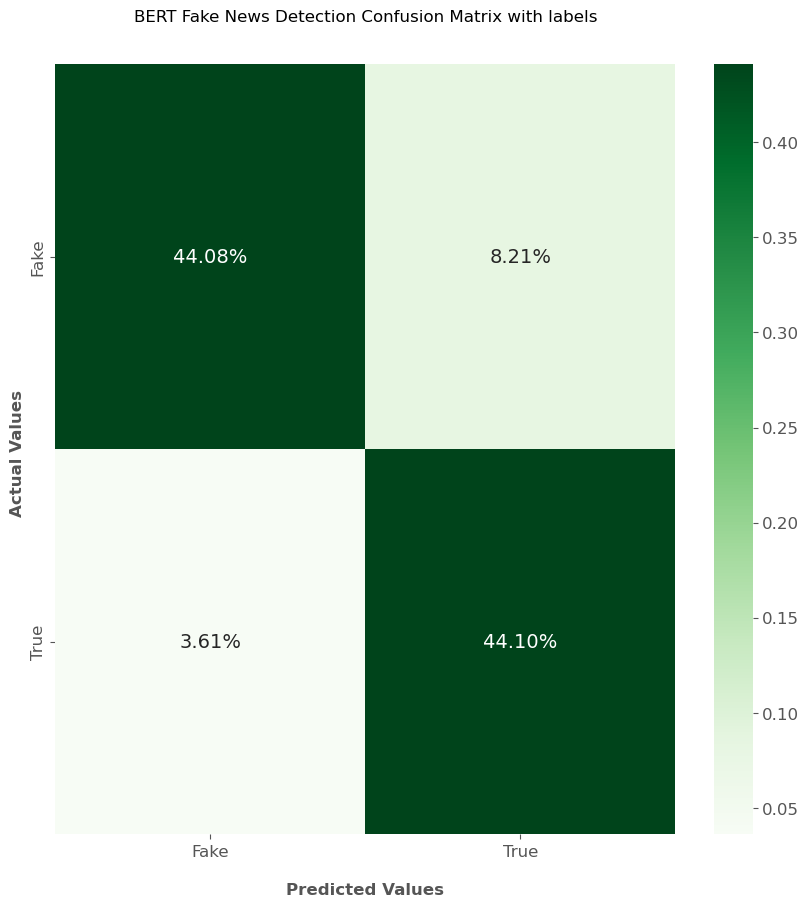

In [50]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Greens')
ax.set_title('BERT Fake News Detection Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fake','True'])
ax.yaxis.set_ticklabels(['Fake','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [51]:
true_data['True/Fake']='True'
fake_data['True/Fake']='Fake'

In [52]:
# Combine the 2 DataFrames into a single data frame
news = pd.concat([true_data, fake_data])
news["Article"] = news["title"] + news["text"]
news.sample(frac = 1) #Shuffle 100%

,title,text,subject,date,Target,True/Fake,Article
2815,EPA chief wants scientists to debate climate o...,WASHINGTON (Reuters) - The U.S. Environmental ...,politicsNews,"July 11, 2017",True,True,EPA chief wants scientists to debate climate o...
14431,Zimbabwe state broadcaster preparing for annou...,HARARE (Reuters) - Zimbabwe s ZBC state broadc...,worldnews,"November 19, 2017",True,True,Zimbabwe state broadcaster preparing for annou...
9862,FBI and DOJ Refusing To Comply With Subpoena O...,Hello Jeff Sessions! Where is the DOJ s leader...,politics,"Sep 20, 2017",Fake,Fake,FBI and DOJ Refusing To Comply With Subpoena O...
3703,Trump administration starts countdown to NAFTA...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"May 18, 2017",True,True,Trump administration starts countdown to NAFTA...
18851,BREAKING WIKILEAKS BOMBSHELL! Murdered DNC Sta...,Conspiracy theories have been surrounding the ...,left-news,"Apr 8, 2017",Fake,Fake,BREAKING WIKILEAKS BOMBSHELL! Murdered DNC Sta...
...,...,...,...,...,...,...,...
21402,UN Celebrates Its 70th Anniversary With Commun...,"In case you hadn t heard, Obama signed a new U...",left-news,"Oct 21, 2015",Fake,Fake,UN Celebrates Its 70th Anniversary With Commun...
13647,"U.S. threatens South Sudan action, Russia warn...",UNITED NATIONS (Reuters) - The United States t...,worldnews,"November 28, 2017",True,True,"U.S. threatens South Sudan action, Russia warn..."
31,McConnell happier with Trump tweets after tax ...,WASHINGTON (Reuters) - A summer spat between P...,politicsNews,"December 22, 2017",True,True,McConnell happier with Trump tweets after tax ...
7309,"Anti-Trump protesters gather for third night, ...",MIAMI (Reuters) - Thousands of protesters took...,politicsNews,"November 9, 2016",True,True,"Anti-Trump protesters gather for third night, ..."


# DATA CLEANING

In [53]:
#Data Cleaning
from nltk.corpus import stopwords
import string

In [54]:
def process_text(s):

    # Check string to see if they are a punctuation
    nopunc = [char for char in s if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Convert string to lowercase and remove stopwords
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_string

In [55]:
# Tokenize the Article
#rerun, takes LOOOONG
import nltk
nltk.download('stopwords')
news['Clean Text'] = news['Article'].apply(process_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adegbolakehinde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
news.sample(5)

,title,text,subject,date,Target,True/Fake,Article,Clean Text
8711,Trump's wife seeks to soften his image at rauc...,CLEVELAND (Reuters) - Donald Trump’s wife Mela...,politicsNews,"July 18, 2016",True,True,Trump's wife seeks to soften his image at rauc...,"[Trumps, wife, seeks, soften, image, raucous, ..."
19761,#FlashbackFriday: Watch Stunning Lies That Led...,"Every single day for months on end, new eviden...",left-news,"Oct 21, 2016",Fake,Fake,#FlashbackFriday: Watch Stunning Lies That Led...,"[FlashbackFriday, Watch, Stunning, Lies, Led, ..."
8165,The Koch Brothers Now Bankrolling The Bundy A...,If you were wondering how a bunch of wannabe r...,News,"February 12, 2016",Fake,Fake,The Koch Brothers Now Bankrolling The Bundy A...,"[Koch, Brothers, Bankrolling, Bundy, AntiGover..."
3933,Senate votes to repeal Labor Department rule o...,WASHINGTON (Reuters) - The U.S. Senate voted n...,politicsNews,"May 4, 2017",True,True,Senate votes to repeal Labor Department rule o...,"[Senate, votes, repeal, Labor, Department, rul..."
23130,Washington Post Sloppy ‘Journalism’ Blames Rus...,Patrick Henningsen 21st Century Wire The mains...,Middle-east,"November 26, 2016",Fake,Fake,Washington Post Sloppy ‘Journalism’ Blames Rus...,"[Washington, Post, Sloppy, ‘Journalism’, Blame..."


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=process_text).fit(news['Clean Text'])

print(len(bow_transformer.vocabulary_)) #Total vocab words

39099


In [58]:
#Bag-of-Words (bow) transform the entire DataFrame of text
news_bow = bow_transformer.transform(news['Clean Text'])

In [59]:
print('Shape of Sparse Matrix: ', news_bow.shape)
print('Amount of Non-Zero occurences: ', news_bow.nnz)

Shape of Sparse Matrix:  (44898, 39099)
Amount of Non-Zero occurences:  44898


In [60]:
sparsity = (100.0 * news_bow.nnz / (news_bow.shape[0] * news_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [61]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(news_bow)
news_tfidf = tfidf_transformer.transform(news_bow)
print(news_tfidf.shape)

(44898, 39099)


In [62]:
#Train Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
fakenews_detect_model = MultinomialNB().fit(news_tfidf, news['True/Fake'])

In [63]:
#Model Evaluation
predictions = fakenews_detect_model.predict(news_tfidf)
print(predictions)

['True' 'True' 'True' ... 'Fake' 'Fake' 'Fake']


In [64]:
from sklearn.metrics import classification_report
print (classification_report(news['True/Fake'], predictions))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00     23481
        True       1.00      1.00      1.00     21417

    accuracy                           1.00     44898
   macro avg       1.00      1.00      1.00     44898
weighted avg       1.00      1.00      1.00     44898



In [65]:
from sklearn.model_selection import train_test_split

news_train, news_test, text_train, text_test = train_test_split(news['Article'], news['True/Fake'], test_size=0.35)

print(len(news_train), len(news_test), len(news_train) + len(news_test))

29183 15715 44898


In [66]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_text)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])
pipeline.fit(news_train,text_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x2e5624e50>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [67]:
prediction = pipeline.predict(news_test)
print(classification_report(prediction,text_test))

              precision    recall  f1-score   support

        Fake       0.96      0.98      0.97      8050
        True       0.98      0.96      0.97      7665

    accuracy                           0.97     15715
   macro avg       0.97      0.97      0.97     15715
weighted avg       0.97      0.97      0.97     15715



In [68]:
cf_matrix = confusion_matrix(prediction,text_test)
print(cf_matrix)

[[7874  176]
 [ 319 7346]]


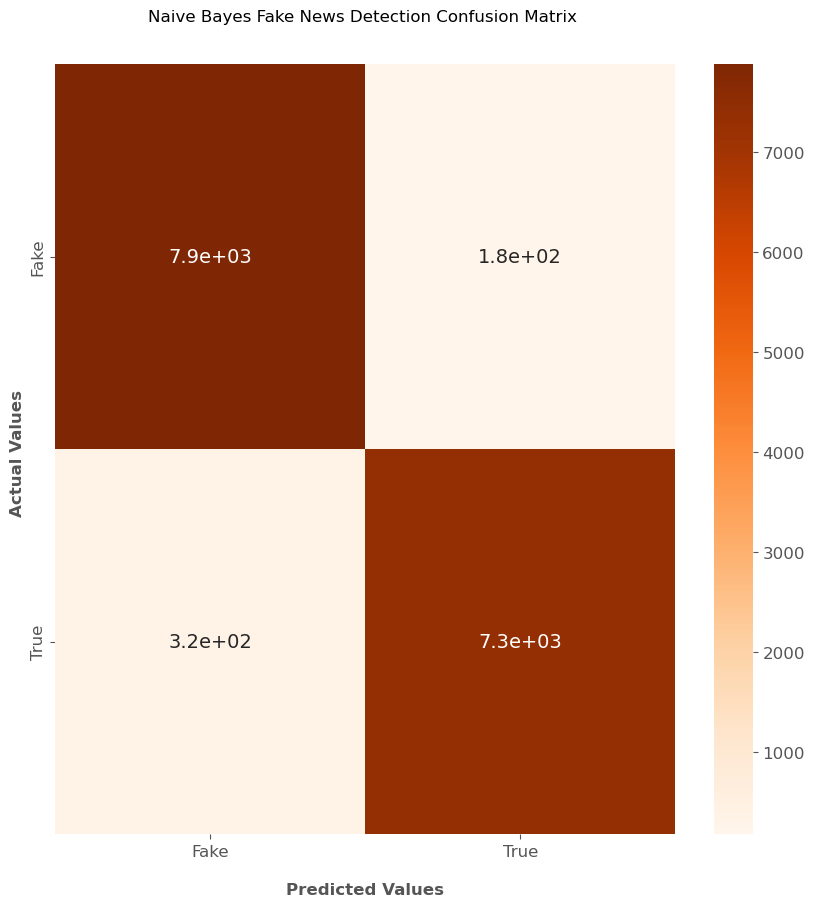

In [69]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Oranges')

ax.set_title('Naive Bayes Fake News Detection Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fake','True'])
ax.yaxis.set_ticklabels(['Fake','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

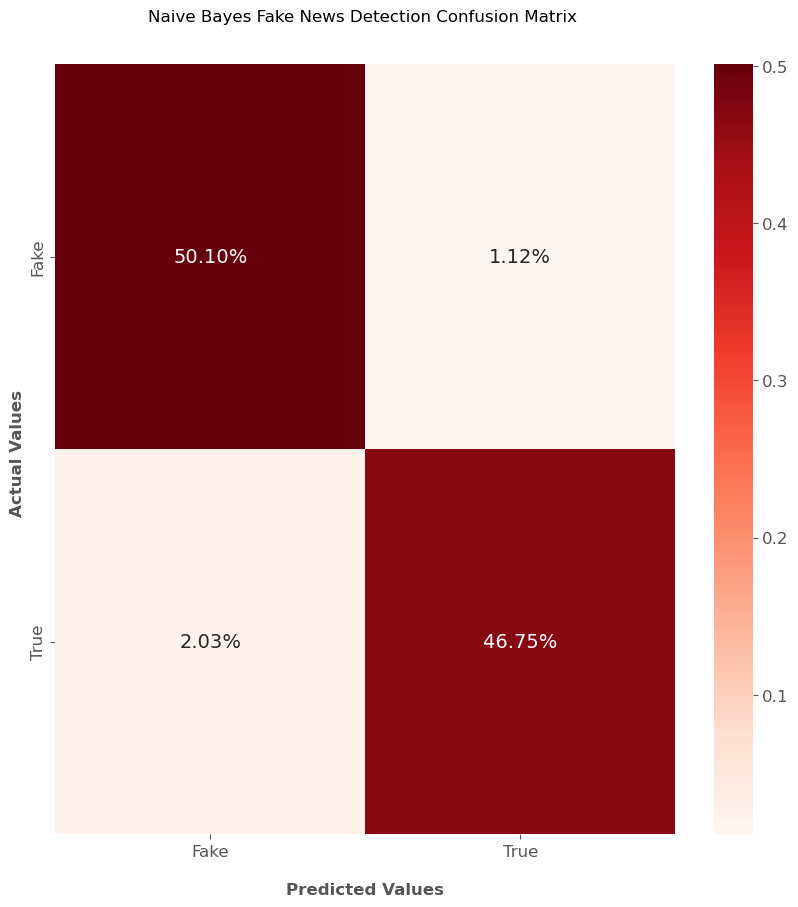

In [70]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Reds')
ax.set_title('Naive Bayes Fake News Detection Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fake','True'])
ax.yaxis.set_ticklabels(['Fake','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm

In [72]:
#Word vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(news['Article'])
Train_X_Tfidf = Tfidf_vect.transform(news_train)
Test_X_Tfidf = Tfidf_vect.transform(news_test)

In [73]:
#SVM Classfier
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', gamma='auto')
SVM.fit(Train_X_Tfidf,text_train)# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy
print(classification_report(predictions_SVM,text_test))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      8196
        True       0.99      0.99      0.99      7519

    accuracy                           0.99     15715
   macro avg       0.99      0.99      0.99     15715
weighted avg       0.99      0.99      0.99     15715



In [74]:
cf_matrix = confusion_matrix(predictions_SVM,text_test)
print(cf_matrix)

[[8146   50]
 [  47 7472]]


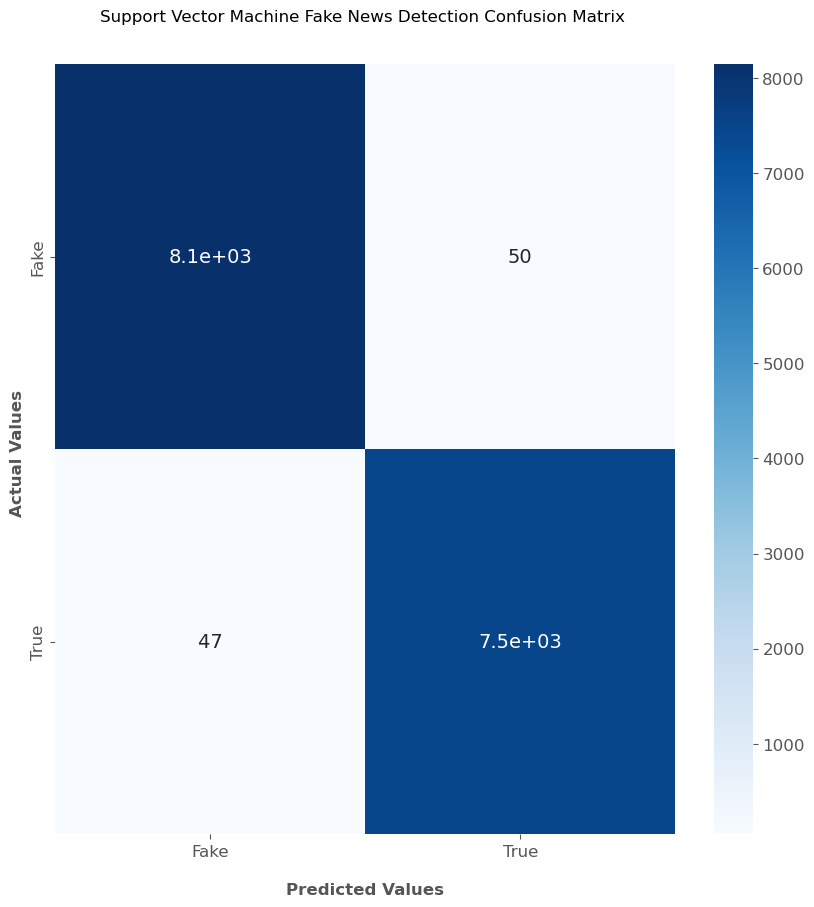

In [75]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Support Vector Machine Fake News Detection Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fake','True'])
ax.yaxis.set_ticklabels(['Fake','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

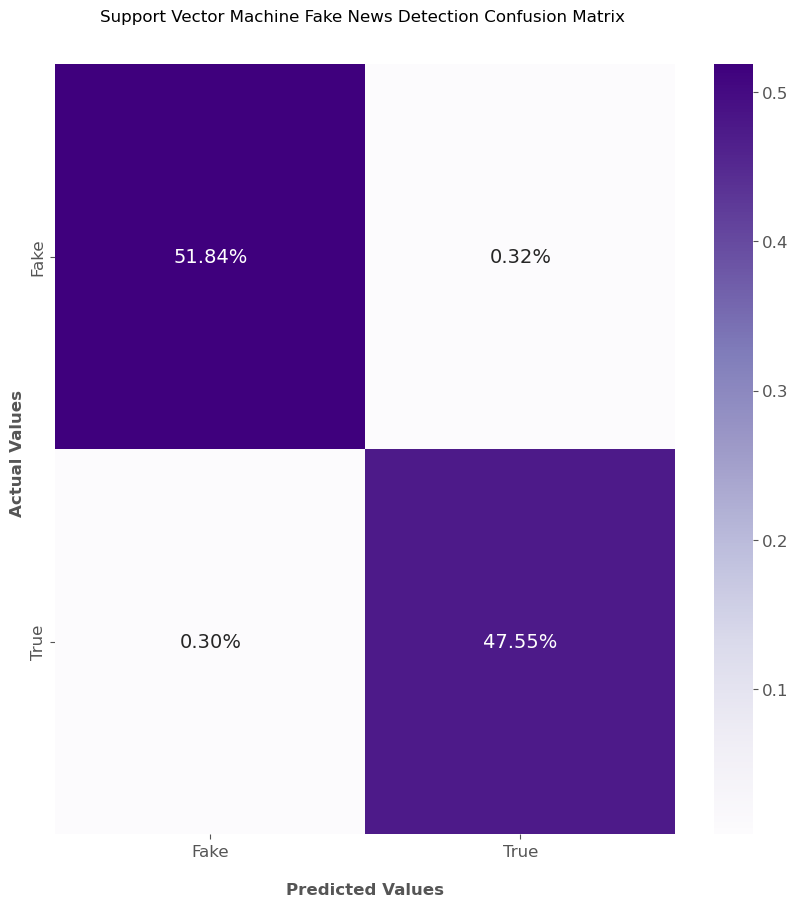

In [76]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Purples')
ax.set_title('Support Vector Machine Fake News Detection Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Fake','True'])
ax.yaxis.set_ticklabels(['Fake','True'])
## Display the visualization of the Confusion Matrix.
plt.show()